1. **INTRODUCTION**

**Predicting Maternal Health Risks**

Maternal health refers to the health of women during pregnancy, childbirth and the postnatal period.  

**Import data & Fist look**

The first thing we are going to do is to add the libraries we will use and upload the dataset gotten from kaggle.

Machine Learning Algorithms used:

Random Forest Classifier

Decision Tree Classifier

XGB Classifier

Gradient Boosting classifier 

KNearest Neighbor 




**Dataframe variables description:**

**Age**: Age in years when a woman is pregnant.

**SystolicBP**: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.

**DiastolicBP**: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.

**BS**: Blood glucose levels is in terms of a molar concentration, mmol/L.

**HeartRate**: A normal resting heart rate in beats per minute.

**Risk Level**: Predicted Risk Intensity Level during pregnancy considering the previous attribute


Therefore, the goal of this project is to examine the risk variables connected to the dataset's risk level and to find fit/final models that could predict maternal complications.

**2. Importing Basic Libraries**

In [ ]:
#import libraries

#data wrangling and pre-processing
import numpy as np
import pandas as pd

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split

#Model Validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

#cross validation
from sklearn.model_selection import StratifiedKFold

#machine learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb


from scipy import stats

#Libraries used in MLA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn import ensemble, tree, linear_model
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split as split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix




 2.1 Understanding The dataset

In [ ]:
#Load the data set 
from google.colab import files
uploaded = files.upload()

Saving Maternal Health Risk Data Set.csv to Maternal Health Risk Data Set (1).csv


In [ ]:
#Store the data into a variable
import pandas as pd
dt = pd.read_csv('Maternal Health Risk Data Set.csv')

#Print the first seven rows of the data
dt.head(7)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk


**3. Exploratory Data Analysis**

Next we check the distribution of the various risk range in the total dataset.

Data Cleaning and Preprocessing

In [ ]:
#Looking for variables Data type
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
#Next we convert the target varible from a categorical format to a numerical format.
#I encountered some difficulties here trying to find a suitable way to convert from categorical to neumerical format
from sklearn.preprocessing import LabelEncoder
Risk = LabelEncoder()

In [ ]:
dt['Risk'] = Risk.fit_transform(dt.RiskLevel)
dt.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Risk
0,25,130,80,15.0,98.0,86,high risk,0
1,35,140,90,13.0,98.0,70,high risk,0
2,29,90,70,8.0,100.0,80,high risk,0
3,30,140,85,7.0,98.0,70,high risk,0
4,35,120,60,6.1,98.0,76,low risk,1


High Risk = 0 

LowRisk = 1 

Medium Risk = 2

In [ ]:
dt.Risk.value_counts()

1    406
2    336
0    272
Name: Risk, dtype: int64

In [ ]:
#Next we drop the risk level column to avoid redundancy 
dt.drop(columns=["RiskLevel"], inplace=True)

In [ ]:
#Getting info about the data
dt.shape

#there a toatal of 1014 records and 6 features with 1 target variable

(1014, 7)

In [ ]:
#Checking for null values
dt.isnull().values.any()

False

In [ ]:
#checking missing values in dataset columnwise
dt.isna().sum()

#The result shows no missing values

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
Risk           0
dtype: int64

In [ ]:
#Statistical summary of numerical columns
dt.describe(include = [np.number])

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Risk
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,1.063116
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.772146
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


In [ ]:
# sorting with respect to a variable
dt.sort = dt.sort_values(by = 'Risk', ascending = False).head()
dt.sort.head()

<ipython-input-16-87c419609d73>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dt.sort = dt.sort_values(by = 'Risk', ascending = False).head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Risk
507,18,120,80,7.9,102.0,76,2
633,19,120,85,9.0,98.0,60,2
704,12,100,50,6.0,98.0,70,2
673,12,100,50,6.4,98.0,70,2
670,10,100,50,6.0,99.0,70,2


**4. Data Visualization**

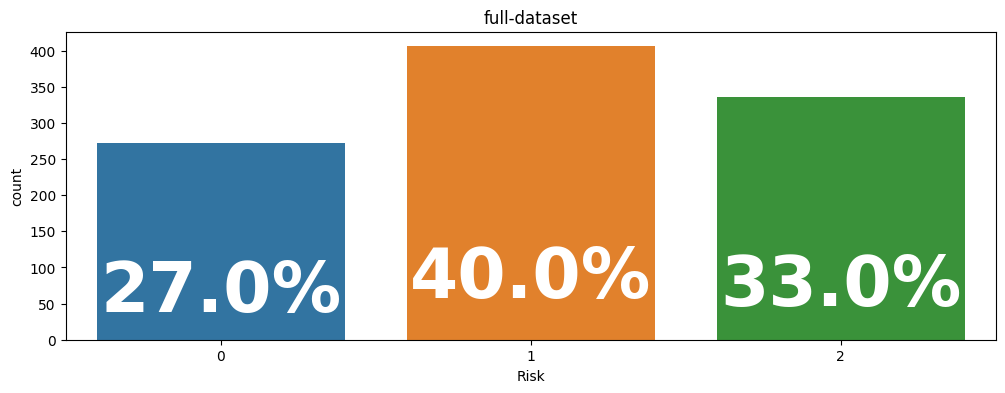

In [ ]:
def visualize_ds(dt: pd.DataFrame, title: str) -> None:

    plt.figure(figsize=(12, 4))
    ax = sns.countplot(data=dt, x='Risk')
    ax.set_title(title)

    for i in ax.patches:

        ax.text(
            x=i.get_x() + i.get_width() / 2,
            y=i.get_y() + i.get_height() / 7,
            s=f"{np.round(i.get_height() / len(dt)* 100.)}%",
            ha="center",
            size=50,
            weight="bold",
            color="white"
        )
        

visualize_ds(dt, "full-dataset")



**4.1 AGE**

This plot shows the age distribution of the data

Where 

0 represents high risk

1 represents normal risk

2 represnts medium risk 

We can see that 27% of the total datasets are at high risk while 40% are normal and 33% of the women in our dataset are in normal risk of maternal predictablility.

In [ ]:
def num_plot(data, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=col, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=col, ax=ax[1])
    ax[0].set_title(f"{col} Distribution Histogram")
    ax[1].set_title(f"{col} Distribution Boxplot")

    plt.show()

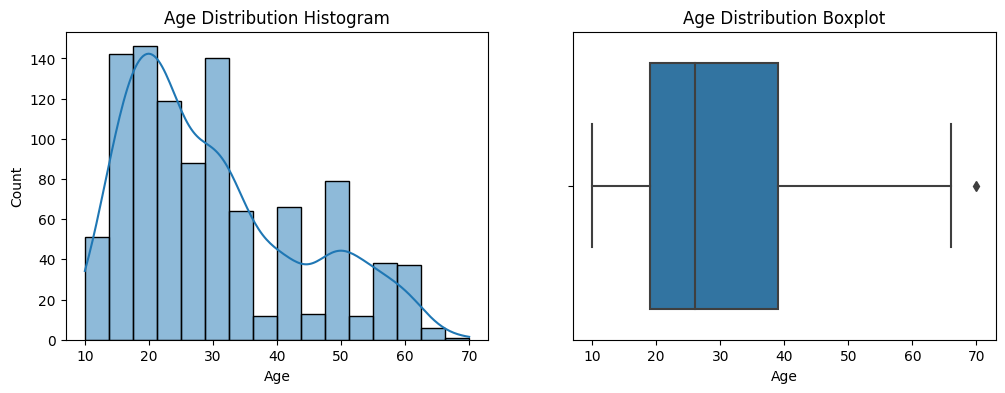

In [ ]:
#Distribution of Age
num_plot(dt, "Age")

In [ ]:
#Df Age basic descriptive statistics
print('Age min: {age}'.format(age = dt['Age'].min()))
print('Age max: {age}'.format(age = dt['Age'].max()))
print('Age avg: {age}'.format(age = dt['Age'].mean()))
print('Age median: {age}'.format(age = dt['Age'].median()))
print('Age std: {age}'.format(age = dt['Age'].std()))

Age min: 10
Age max: 70
Age avg: 29.871794871794872
Age median: 26.0
Age std: 13.474385532634372


In [ ]:
#Age value counts
data = dt[['Age']].value_counts().reset_index()
data.rename(columns={data.columns[1]:'Count'}, inplace=True)
fig = px.bar(data, x='Age', y='Count',width=800, height=400)
fig.update_layout(
    title='Number of people per Age',
    yaxis_title="Count")
fig.show()

These plot describes that about a high amount of women in the data set are in their 20s

In [ ]:
#Use the age categories life cylce group by canada statistics department
sections = [(dt['Age'] <= 14 ),\
           (dt['Age'] >= 15) & (dt['Age'] <=24),\
           (dt['Age'] >= 25) & (dt['Age'] <=64),\
           (dt['Age'] > 64)]

choice =['children','youth','adult','senior']
dt['Group'] = np.select(sections, choice)

#Visualization by Group
data = dt[['Group']].value_counts(normalize=True).reset_index()
data.rename(columns={data.columns[1]:'Count'}, inplace=True)
fig = px.bar(data, x='Group', y='Count',width=800, height=400)
fig.update_layout(
    title='Percent per Group',
    yaxis_title="Count")
fig.show()

**Age conlcusion**

From the above plots and visuliazition we can deduce the following:
The mean of the column Age is 30 year old

The median of the column Age is 26 years old

Min 10 years old and Max 70 years old

Range of the dataframe 10 to 70 years old with std 13.5 years

In Age, all of the top ages are below 30 years old, being 23, 19, 17 and 15 years old
Grouped by age categories life cylce group 54.3% are adults, 40% youth, 5.3% children and 0.4% senior

**4.2 SystolicBS and DiastolicBP**

In [ ]:
#Top 5 values with Systolic and Diastolic BP
data = dt[['SystolicBP','DiastolicBP']].value_counts().reset_index()
data.rename(columns={data.columns[2]:'count'}, inplace=True)
data.head()

,SystolicBP,DiastolicBP,count
0,120,80,204
1,120,90,112
2,90,60,67
3,140,100,63
4,90,65,53


In [ ]:
#Systolic BP values 
data = dt[['SystolicBP']].value_counts(normalize =True).reset_index()
data.rename(columns={data.columns[1]:'Count'}, inplace=True)
fig = px.histogram(data, x='SystolicBP', y='Count',nbins=20,width=600, height=400)
fig.update_layout(
    title='Systolic BP count',
    yaxis_title="Count")
fig.show()

#Diastolic BP values
data = dt[['DiastolicBP']].value_counts(normalize=True).reset_index()
data.rename(columns={data.columns[1]:'Count'}, inplace=True)
fig = px.histogram(data, x='DiastolicBP', y='Count',nbins=20,width=600, height=400)
fig.update_layout(
    title='Diastolic BPcount',
    yaxis_title="Count")
fig.show()

In [ ]:
#categories for Systolic Blood Pressure
#Here we break down the various blood pressure levels into differnet categories.
 
sections = [(dt['SystolicBP'] < 120 ) & (dt['DiastolicBP'] <80),\
           (dt['SystolicBP'] >= 120) & (dt['SystolicBP'] <=129) & (dt['DiastolicBP'] < 80),\
           (dt['SystolicBP'] >= 130) & (dt['SystolicBP'] <=139) | (dt['DiastolicBP'] >= 80) & (dt['DiastolicBP'] <=89),\
           (dt['SystolicBP'] >=140) | (dt['DiastolicBP'] >= 90)]
choice =['normal','elevated','stage 1','stage 2']
dt['Type'] = np.select(sections,choice)

In [ ]:
data = dt[['Type']].value_counts(normalize=True).reset_index()
data.rename(columns={data.columns[1]:'Count'}, inplace=True)
data = data.sort_values(by='Type')
fig = px.bar(data, x="Type", y="Count",width=800, height=400)
fig.update_layout(
    title='Type histogram',
    yaxis_title="Percent")
fig.show()

**Systolic BP Conclusion**

Systolic blood pressure gauges the pressure of blood against artery walls as the bottom two chambers of your heart, the ventricles, contract and force blood to the rest of the body.


The following was deduced from the above visulization of Systolic BP:

44% of the data population blood pressure are between 120 - 124 bp

The Min bp is 70 and The Max is 160 bp

Q1: 100, Q2:120, Q3:NONE

**Diastolic BP Conclusion**

The diastolic blood pressure gauges the pressure exerted by blood on artery walls as the heart rests and the ventricles are given time to re-fill with blood. Diastole, the time between heartbeats when the heart relaxes, is also when your coronary artery can give blood to your heart.

The following was deduced from the above visulization of Systolic BP:

22% of the population are between 80 - 84 bp

The Min bp is 49 and the Max is 100 bp

Q1: 65, Q2:80, Q3: 90

**Systolic and Dyastolic Conclusion**

Between this two exist a classification to know between a "normal" rate and an atypical one, using the Mayo clinic categories chart 33% are normal, 32% stage 1 hypertension, 26% stage 2 hypertension and 7.6 % elevated.

**4.3 Blood Glucose BS**

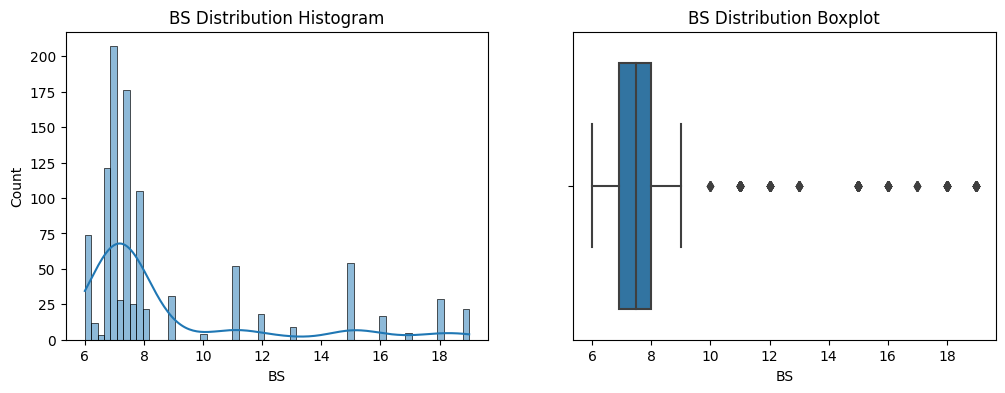

In [ ]:
#Blood sugar distribution
num_plot(dt, "BS")

In [ ]:
#Mayo clinic categories for Blood sugar levels
sections = [(dt['BS'] <= 8),\
           (dt['BS'] > 8) & (dt['BS'] <=11),\
           (dt['BS'] > 11)
           ]
choice =['normal','prediabetes','diabetes']
dt['BSlvl'] = np.select(sections,choice)
data = dt[['BSlvl']].value_counts(normalize=True).reset_index()
data.rename(columns={data.columns[1]:'Count'}, inplace=True)
data = data.sort_values(by='BSlvl')
fig = px.bar(data, x="BSlvl", y="Count",width=800, height=400)
fig.update_layout(
    title='Blood Sugar level histogram',
    yaxis_title="Percent")
fig.show()

**Blood Sugar Level Conclusion**

A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal.

A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes.

A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes.

**Body Temperature**

In [ ]:
#Histogram Body Temperature
data = dt[['Group','BodyTemp']].value_counts().reset_index()
data.rename(columns={data.columns[2]:'Count'}, inplace=True)
fig = px.histogram(data, x='BodyTemp', y='Count',width=1000, height=400,nbins=40,facet_col='Group')
fig.update_layout(
    title='Body Temperature histogram',
    yaxis_title="Count")
fig.show()

**Body Temperature Conclusion**

The body temperature is grouped into the 4 categoreies Adult, youth, children and senior.

Nearly 80% of the sample in the youth and adult group falls between 98 and 99 which is the normal number, compared to 40% for children and 60% for seniors.

An infection or disease may be the reason of a body temperature over 100.


**Heart Rate**

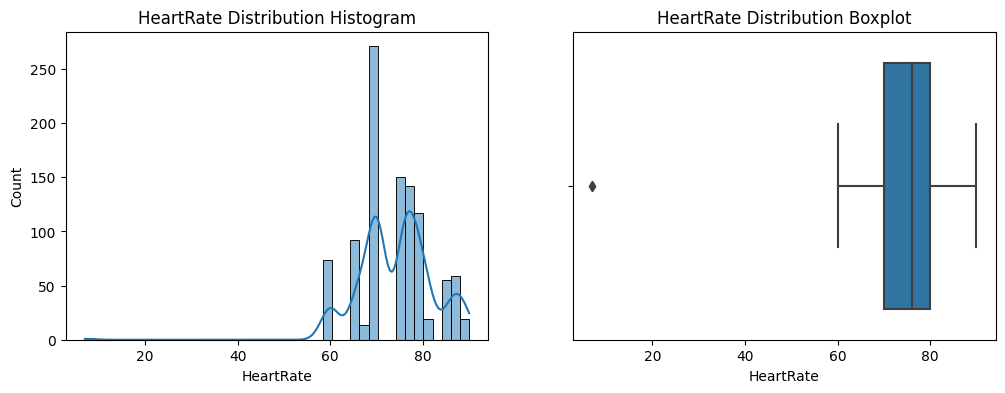

In [ ]:
num_plot(dt, "HeartRate")

Heart Rate Conslusion

The higher percentage of the group's heartrate is between 70-75 

Numerical Distribution Using Pair Plots

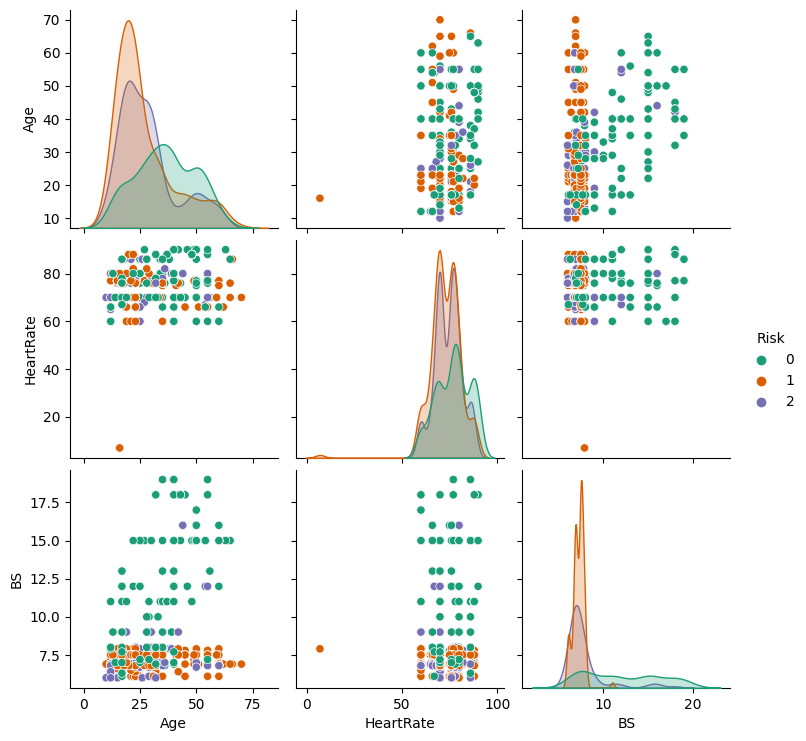

In [ ]:
#Distribution od numerical values
#Pair Plots

sns.pairplot(dt, hue='Risk', palette = 'Dark2', vars= ['Age','HeartRate','BS'])

A pair plot is a visualization technique that allows us to plot pairwise relationships across an entire dataset.The above vizulaization shows the relation between the selected variables i.e is Age, heartrate, blood sugar and the target variable Risk to help identify patterns and trends in the data.

**Checking Out The Correlation**

In [ ]:
pd.options.display.float_format ='{:,.4f}'.format
corr_matrix = dt.corr()
corr_matrix

<ipython-input-32-8b7fd960dbc6>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Risk
Age,1.0000,0.4160,0.3980,0.4733,-0.2553,0.0798,-0.2119
SystolicBP,0.4160,1.0000,0.7870,0.4252,-0.2866,-0.0231,-0.2088
DiastolicBP,0.3980,0.7870,1.0000,0.4238,-0.2575,-0.0462,-0.2846
BS,0.4733,0.4252,0.4238,1.0000,-0.1035,0.1429,-0.4800
BodyTemp,-0.2553,-0.2866,-0.2575,-0.1035,1.0000,0.0988,-0.0067
HeartRate,0.0798,-0.0231,-0.0462,0.1429,0.0988,1.0000,-0.1116
Risk,-0.2119,-0.2088,-0.2846,-0.4800,-0.0067,-0.1116,1.0000


In [ ]:
corr_matrix['Risk'].sort_values(ascending=False)

Risk           1.0000
BodyTemp      -0.0067
HeartRate     -0.1116
SystolicBP    -0.2088
Age           -0.2119
DiastolicBP   -0.2846
BS            -0.4800
Name: Risk, dtype: float64

The correlation ranges from -1 to +1 when it is close to +1 this signifies that there is a string positive correlation, so we can see thee is a stong positive correlation between Risk

<ipython-input-34-fb89909ba305>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



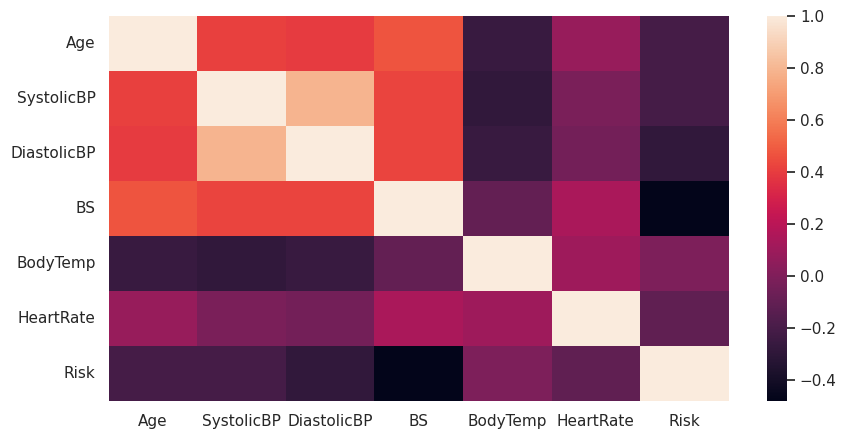

In [ ]:
#Check correlation heatmap for all values
sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(dt.corr())
plt.show()

Before dividing the dataset into target and feaature variables, we have to drop the rest rows that  were created during the data exploration process to avoid it affecting our results

**Feature Selection**

In [ ]:
dt.drop(columns=["Group", 'Type', 'BSlvl'], inplace=True)

For this stage, the dataset would be split into train and test set. 80% of the data set would be used for training while the remaining 20% would be used for testing

In [ ]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['Risk'],axis=1)
Y = dt['Risk']

print(X)

      Age  SystolicBP  DiastolicBP      BS  BodyTemp  HeartRate
0      25         130           80 15.0000   98.0000         86
1      35         140           90 13.0000   98.0000         70
2      29          90           70  8.0000  100.0000         80
3      30         140           85  7.0000   98.0000         70
4      35         120           60  6.1000   98.0000         76
...   ...         ...          ...     ...       ...        ...
1009   22         120           60 15.0000   98.0000         80
1010   55         120           90 18.0000   98.0000         60
1011   35          85           60 19.0000   98.0000         86
1012   43         120           90 18.0000   98.0000         70
1013   32         120           65  6.0000  101.0000         76

[1014 rows x 6 columns]


In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       1
       ..
1009    0
1010    0
1011    0
1012    0
1013    2
Name: Risk, Length: 1014, dtype: int64


In [ ]:
#Choosing the SEED for my code wasn't just random as in the process of working i noticed that the value of SEED actually 
#factors in the performance of the ML models. So i tried choosing different seed values like 1, 3, 5, 7, 9, 11 to see which one worked best 
#and decided to go with 9 as seen below as it was quite suitable for desired reukts tthe ML models produced
# SEED = 7
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=SEED)
# X_train.shape, X_test.shape

**stratify=Y** the stratisfy parameter was also experimented with here as it was not addeded to my code because the ML models performed better without it. More details in my report.

In [ ]:
#I also experimented with the test_size as i initially shared my datset on a 70:30 ratio 
#I compared it with 80:20 to see which produced a better result

SEED = 9
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=SEED)
X_train.shape, X_test.shape

((811, 6), (203, 6))

Next, we scale the data using the standard scaler

In [ ]:
#Scale the X dataset
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

**Applying Machine Learning Models**

In [ ]:
from pandas.core.common import random_state
#Machine Learning Algorithms
MLA = [
    #Ensemble Methods
    ensemble.GradientBoostingClassifier(random_state=SEED),
    ensemble.RandomForestClassifier(random_state=SEED),

    #Trees    
    tree.DecisionTreeClassifier(random_state=SEED),
    

    XGBClassifier(eval_metric="mlogloss"),
    KNeighborsClassifier(n_neighbors=3),

]

In [ ]:
#Create a dataframe
MLA_compare = pd.DataFrame()

#Function for MLA append to dataframe
def MLA_testing(MLA, X_train, X_test):
    row_index = 0
    for classifier in MLA:
        
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test_scaled)
        classifier_accuracy_score = accuracy_score(y_test, y_pred)

        kfold_accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

        MLA_name = classifier.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Accuracy Score'] = classifier_accuracy_score*100
        MLA_compare.loc[row_index, 'K-Fold Accuracy'] = kfold_accuracy.mean()*100
   
       # print(MLA_name, "Done")
        row_index+=1

In [ ]:
MLA_testing(MLA=MLA, X_train=X_train_scaled, X_test=X_test)

MLA_compare = MLA_compare.sort_values(by="Accuracy Score", ascending=False).reset_index(drop=True)
MLA_compare

,MLA Name,Accuracy Score,K-Fold Accuracy
0,RandomForestClassifier,89.6552,81.8820
1,DecisionTreeClassifier,88.1773,80.3990
2,XGBClassifier,88.1773,81.2632
3,GradientBoostingClassifier,83.2512,76.4514
4,KNeighborsClassifier,76.8473,66.2180


**Hyper parameter tunning**

In [ ]:
params = {
    "n_estimators": [10, 20, 50, 100],
    "criterion": ["gini", "entropy"]
}
rf = RandomForestClassifier(random_state=100)
grid = GridSearchCV(rf, params, cv=10)
grid.fit(X_train, y_train)
print("Best hyperparameter:", grid.best_params_)


Best hyperparameter: {'criterion': 'gini', 'n_estimators': 50}


**Print Testing prediction**

In [ ]:
y_pred = grid.predict(X_test)
print(f"Processed Dataset Accuracy: {accuracy_score(y_test, y_pred)}")

Processed Dataset Accuracy: 0.896551724137931


# **Model Evaluation**

Random Forest Classifier

In [ ]:
def eval_model(model, x_train = X_train, y_train = y_train, x_test = X_test, y_test = y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))
eval_model(model = RandomForestClassifier())


              precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.87      0.87      0.87        75
           2       0.88      0.86      0.87        77

    accuracy                           0.89       203
   macro avg       0.90      0.90      0.90       203
weighted avg       0.89      0.89      0.89       203



Decision Tree Classifier

In [ ]:
eval_model(model = DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        51
           1       0.86      0.87      0.86        75
           2       0.88      0.83      0.85        77

    accuracy                           0.88       203
   macro avg       0.89      0.89      0.89       203
weighted avg       0.88      0.88      0.88       203



XGB Classifier

In [ ]:
eval_model(model = XGBClassifier())

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        51
           1       0.87      0.89      0.88        75
           2       0.87      0.84      0.86        77

    accuracy                           0.88       203
   macro avg       0.89      0.89      0.89       203
weighted avg       0.88      0.88      0.88       203



Gradient Boosting Classifier

In [ ]:
eval_model(model = GradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        51
           1       0.80      0.88      0.84        75
           2       0.79      0.75      0.77        77

    accuracy                           0.83       203
   macro avg       0.85      0.84      0.84       203
weighted avg       0.83      0.83      0.83       203



K Neighbors Classifier

In [ ]:
eval_model(model = KNeighborsClassifier(n_neighbors=3))

              precision    recall  f1-score   support

           0       0.86      0.63      0.73        51
           1       0.74      0.80      0.77        75
           2       0.68      0.75      0.72        77

    accuracy                           0.74       203
   macro avg       0.76      0.73      0.74       203
weighted avg       0.75      0.74      0.74       203



In [ ]:
#Logistic regression was initiallly used as part of the algorithms choosen 
#It wasn't siutable and kept given a poor result no matter how hard i tried 
#I later relised iwth the help of my lab tuttor that logistic regression was not suitable for my dataset
#given the fact that my target column was a multi-class and not binary


**Feature Importance**

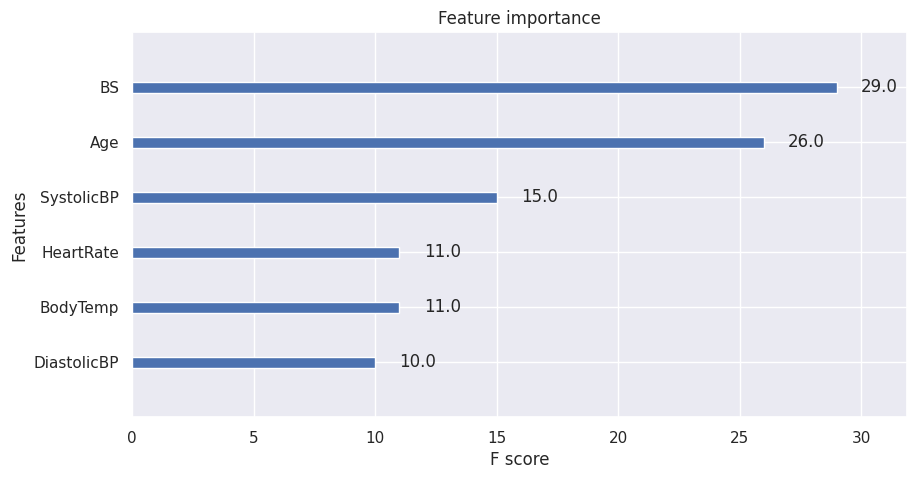

In [ ]:
#Import xgb model
import xgboost as xgb

# Create the DMatrix (XGB has it´s own API)
maternal_dmatrix = xgb.DMatrix(data = X, label = Y)

params = {'eval_metric':"mlogloss"}

# Train the model: xg_reg
xg_reg = xgb.train(dtrain=maternal_dmatrix,params=params,num_boost_round=5)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

**CONCLUSION**

The Blood Sugar (BS) being the top one in Feature importance table, is an important factor for risk level, 76% of the dataset have normal Blood Sugar Level BUT only 44% of the population are between 120 -124 bp (Systolic BP). BS levels are related to Age, Systolic and Diastolic as variables increase. The risk to have a high level of glucose in blood is related to lifestyle in different groups.

We have also interpreted the top three performing algorithm i.e.,
Random Forest,Decision Tree, XGB 

**The top 3 most contribution features are:**
1. Blood Sugar
2. Age
3. Systolic BP